# Intro:
We're going to see what a winning team looks like statistically with:
- Wins vs losses
- Goals scored vs mediocre team goals scored
- The team attributes

## Import Dependencies

In [26]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.ticker as ticker
import seaborn as sns
import sqlite3
import datetime
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import Data

In [27]:
with sqlite3.connect('database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    player = pd.read_sql_query("SELECT * from Player",con)
    player_attributes = pd.read_sql_query("SELECT * from Player_Attributes",con)
    sequence = pd.read_sql_query("SELECT * from sqlite_sequence",con)
    team_attributes = pd.read_sql_query("SELECT * from Team_Attributes",con)

## Merge Data

### Team and Attributes

In [28]:
teamsDF = teams.merge(team_attributes, on=['team_api_id', 'team_fifa_api_id'])
teamsDF.drop(['id_x', 'id_y'], axis=1, inplace=True)
teamsDF.drop_duplicates(subset=['date', 'team_long_name'], inplace = True)
teamsDF.duplicated(subset = ['date', 'team_long_name']).sum()
teamsDF.sample(3)

,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
374,8481,1823.0,AS Nancy-Lorraine,NAN,2013-09-20 00:00:00,49,Balanced,NaN,Little,49,Mixed,Organised,52,Normal,53,Normal,67,Lots,Organised,43,Medium,46,Press,50,Normal,Cover
1342,10278,100879.0,Hércules Club de Fútbol,HER,2010-02-22 00:00:00,40,Balanced,NaN,Little,30,Short,Organised,50,Normal,35,Normal,70,Lots,Organised,35,Medium,35,Press,50,Normal,Cover
1085,7841,744.0,Rio Ave FC,RA,2012-02-22 00:00:00,36,Balanced,NaN,Little,38,Mixed,Organised,60,Normal,54,Normal,54,Normal,Organised,39,Medium,50,Press,42,Normal,Cover


In [29]:
teamsDF.shape

(1450, 26)

In [30]:
a, b, c = teams.shape, team_attributes.shape, teamsDF.shape
print('Original "team" shape:            ' + str(a))
print('Original "team attributes" shape: ' + str(b))
print('Modified "teamDF" shape:          ' + str(c))

Original "team" shape:            (299, 5)
Original "team attributes" shape: (1458, 25)
Modified "teamDF" shape:          (1450, 26)


### Country, League, and Match

In [31]:
leaguesDF = countries.merge(leagues, on=['id'])
leaguesDF = leaguesDF.rename(columns={'name_x':'Country', 'name_y':'League'})
leaguesDF.sample(3)

,id,Country,country_id,League
0,1,Belgium,1,Belgium Jupiler League
9,21518,Spain,21518,Spain LIGA BBVA
1,1729,England,1729,England Premier League


In [32]:
leaguesDF = leaguesDF.merge(matches, on = ['country_id'])
leaguesDF.sample(3)

,id_x,Country,country_id,League,id_y,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
6632,4769,France,4769,France Ligue 1,6633,4769,2012/2013,6,2012-09-23 00:00:00,1216865,8592,4087,1,0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,2.0,4.0,6.0,8.0,5.0,2.0,8.0,4.0,6.0,6.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,6.0,7.0,7.0,9.0,9.0,11.0,31293.0,179891.0,26307.0,149962.0,40740.0,41232.0,78185.0,26112.0,40060.0,95955.0,38098.0,38805.0,210691.0,93343.0,192319.0,74169.0,30749.0,26333.0,185000.0,210692.0,41194.0,148832.0,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,1.40,4.50,8.0,1.40,4.2,8.50,1.4,4.1,7.0,1.40,4.33,9.0,1.42,4.6,9.5,1.4,4.33,8.50,1.40,4.33,9.0,1.40,4.6,9.5,1.40,4.20,8.5,1.36,4.50,8.5
22280,21518,Spain,21518,Spain LIGA BBVA,22281,21518,2010/2011,1,2010-08-28 00:00:00,875459,9864,10267,1,3,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,6.0,4.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,33826.0,33843.0,188517.0,41707.0,163236.0,11758.0,24612.0,128870.0,23779.0,56819.0,51545.0,24494.0,34007.0,30276.0,30914.0,26403.0,108568.0,30666.0,37824.0,41468.0,32762.0,33028.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>39</comment><event...,2.88,3.30,2.4,2.85,3.3,2.35,2.7,3.2,2.4,2.80,3.20,2.2,NaN,NaN,NaN,2.9,3.25,2.25,2.80,3.25,2.5,2.88,3.2,2.4,2.85,3.25,2.4,2.90,3.25,2.3
13527,13274,Netherlands,13274,Netherlands Eredivisie,13528,13274,2008/2009,4,2008-09-27 00:00:00,523679,8611,8526,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.36,4.75,8.0,1.35,4.5,7.25,1.4,3.9,6.0,1.36,4.00,7.0,NaN,NaN,NaN,1.4,3.75,7.00,1.36,4.33,7.5,1.33,4.5,7.5,1.35,4.50,7.0,1.36,4.33,7.5


In [33]:
a, b = leaguesDF.shape, matches.shape
print('Modified "leagueDF" shape: ' + str(a))
print('Original "matches" shape:  ' + str(b))

Modified "leagueDF" shape: (25979, 118)
Original "matches" shape:  (25979, 115)


In [34]:
# capture only two columns
temp = teamsDF[['team_api_id', 'team_long_name']]
# rename the column to match other df for key
temp = temp.rename(columns={'team_api_id':'home_team_api_id'}) 
# make sure there's no duplicates
temp.drop_duplicates(subset=['home_team_api_id', 'team_long_name'], inplace = True)
# merge them together on 'home_team_api_id'
leaguesDF = leaguesDF.merge(temp, on=['home_team_api_id'], how='left')
# rename again for away columns
temp = temp.rename(columns={'home_team_api_id':'away_team_api_id'}) 
# merge again
leaguesDF = leaguesDF.merge(temp, on=['away_team_api_id'], how='left')
# drop some useless features
leaguesDF.drop(['id_x', 'id_y', 'country_id', 'league_id', 'stage'], axis=1, inplace=True)
# create a copy of 'leagueDF' to simplify the information even more
leaguesFinal = leaguesDF
leaguesFinal = leaguesFinal[['Country', 'League', 'season', 'date', 'match_api_id', 'team_long_name_x', 
                       'team_long_name_y', 'home_team_goal', 'away_team_goal']]

In [35]:
leaguesFinal = leaguesFinal.rename(columns={'team_long_name_x':'Home Team', 'team_long_name_y':'Away Team'})
leaguesFinal.sample(3)

,Country,League,season,date,match_api_id,Home Team,Away Team,home_team_goal,away_team_goal
22639,Spain,Spain LIGA BBVA,2010/2011,2010-10-24 00:00:00,875620,Sevilla FC,Athletic Club de Bilbao,4,3
8192,Germany,Germany 1. Bundesliga,2009/2010,2009-12-19 00:00:00,674419,Eintracht Frankfurt,VfL Wolfsburg,2,2
16927,Poland,Poland Ekstraklasa,2013/2014,2013-07-20 00:00:00,1467599,Zawisza Bydgoszcz,Jagiellonia Białystok,0,1


In [36]:
def win(leaguesFinal):
    if leaguesFinal['home_team_goal'] > leaguesFinal['away_team_goal']:
        return leaguesFinal['Home Team']
    elif leaguesFinal['away_team_goal'] > leaguesFinal['home_team_goal']:
        return leaguesFinal['Away Team']
    elif leaguesFinal['home_team_goal'] == leaguesFinal['away_team_goal']:
        return "DRAW"
    
def loss(leaguesFinal):
    if leaguesFinal['home_team_goal'] < leaguesFinal['away_team_goal']:
        return leaguesFinal['Home Team']
    elif leaguesFinal['away_team_goal'] < leaguesFinal['home_team_goal']:
        return leaguesFinal['Away Team']
leaguesFinal["win"] = leaguesFinal.apply(lambda leaguesFinal:win(leaguesFinal),axis=1)
leaguesFinal["loss"] = leaguesFinal.apply(lambda leaguesFinal:loss(leaguesFinal),axis=1)

In [37]:
leaguesFinal.shape

(25979, 11)

In [38]:
leaguesFinal.sample(3)

,Country,League,season,date,match_api_id,Home Team,Away Team,home_team_goal,away_team_goal,win,loss
24944,Switzerland,Switzerland Super League,2010/2011,2010-11-07 00:00:00,845090,Grasshopper Club Zürich,FC St. Gallen,2,0,Grasshopper Club Zürich,FC St. Gallen
12109,Italy,Italy Serie A,2012/2013,2012-10-07 00:00:00,1287032,Napoli,Udinese,2,1,Napoli,Udinese
2940,England,England Premier League,2011/2012,2011-12-17 00:00:00,1024983,Everton,Norwich City,1,1,DRAW,None


## Feature Engineering

### Team Record (Win/Loss) DataFrame

In [39]:
seasons = leaguesFinal['season'].unique()
teams = teamsDF['team_long_name'].unique()
df = []

for i in seasons:
    season = leaguesFinal['season'] == i
    season = leaguesFinal[season]
    for j in teams:
        team_season_wins = season['win'] == j
        team_season_win_record = team_season_wins[team_season_wins].count()
        team_season_loss = season['loss'] == j
        team_season_loss_record = team_season_loss[team_season_loss].count()
        df.append((j, i, team_season_win_record, team_season_loss_record))
df = pd.DataFrame(df, columns=('Team', 'Seasons', 'Wins', 'Losses'))
df = df.rename(columns={'Team':'Home Team'}) 
df2 = leaguesFinal[['Home Team', 'League']]
df2.drop_duplicates(subset = ['Home Team'],inplace = True)
df = df.merge(df2, on = 'Home Team')
df = df.rename(columns={'Home Team':'Team'}) 
teamRecords = df
teamRecords = teamRecords[['League', 'Team', 'Seasons', 'Wins', 'Losses']]
teamRecords = teamRecords[teamRecords.Wins != 0]
teamRecords = teamRecords[teamRecords.Losses != 0]
teamRecords.sample(5)

,League,Team,Seasons,Wins,Losses
1223,Italy Serie A,Carpi,2015/2016,9,18
131,Belgium Jupiler League,Sint-Truidense VV,2011/2012,3,17
1766,Portugal Liga ZON Sagres,Boavista FC,2014/2015,9,18
2172,Switzerland Super League,Grasshopper Club Zürich,2012/2013,20,7
919,Germany 1. Bundesliga,FC Augsburg,2015/2016,9,14


In [40]:
teamRecords.shape

(1453, 5)

### Team Goals by Season

In [41]:
df = []
home_goals = leaguesFinal.groupby(('Home Team', 'season'))['home_team_goal'].sum()
away_goals = leaguesFinal.groupby(('Away Team', 'season'))['away_team_goal'].sum()
a = home_goals.rename_axis(['Team','season'])
b = away_goals.rename_axis(['Team','season'])
df = (a.add(b, fill_value=0)).reset_index(name='Goals')
df = df.rename(columns={'season':'Seasons'}) 
teamRecords = teamRecords.merge(df, on = ['Team', 'Seasons'], how = 'left')
teamRecords.sort_values(['League', 'Team', 'Seasons'], ascending = True, inplace = True)
teamRecords.shape

(1453, 6)

In [42]:
teamRecords.sample(3)

,League,Team,Seasons,Wins,Losses,Goals
466,Germany 1. Bundesliga,FC Schalke 04,2010/2011,11,16,38
262,England Premier League,Southampton,2015/2016,18,11,59
1309,Spain LIGA BBVA,Athletic Club de Bilbao,2011/2012,12,13,49


### League Winners

In [43]:
# create a df of the team with the best record from each 'League' for each 'Seasons'
leagueWinners_season = teamRecords
leagueWinners_season.sort_values(['League', 'Seasons', 'Wins'], ascending = False, inplace = True)
leagueWinners_season = leagueWinners_season[leagueWinners_season.Wins > 10]
leagueWinners_season = leagueWinners_season.groupby(['League', 'Seasons']).first()
leagueWinners_season.sample(3)

Team  Wins  Losses  Goals
League        Seasons                                 
Italy Serie A 2009/2010     Inter    24       4     75
              2012/2013  Juventus    27       5     71
              2008/2009     Inter    25       4     70

### League Losers

In [44]:
leagueLosers_season = teamRecords
leagueLosers_season.sort_values(['League', 'Seasons', 'Losses'], ascending = False, inplace = True)
leagueLosers_season = leagueLosers_season[leagueLosers_season.Losses > 10]
leagueLosers_season = leagueLosers_season.groupby(['League', 'Seasons']).first()
leagueLosers_season.sample(3)

,,Team,Wins,Losses,Goals
League,Seasons,,,,
Netherlands Eredivisie,2013/2014,Roda JC Kerkrade,7,19,44
Switzerland Super League,2008/2009,FC Vaduz,5,24,28
Portugal Liga ZON Sagres,2010/2011,Naval 1° de Maio,5,17,26


### Team Attributes Catagories

In [45]:
teamsDF.sample(3)

,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
918,9761,1904.0,NAC Breda,NAC,2011-02-22 00:00:00,33,Slow,NaN,Little,44,Mixed,Free Form,35,Normal,40,Normal,60,Normal,Organised,42,Medium,47,Press,54,Normal,Cover
146,10252,2.0,Aston Villa,AVL,2011-02-22 00:00:00,65,Balanced,NaN,Little,50,Mixed,Organised,45,Normal,55,Normal,50,Normal,Organised,35,Medium,45,Press,65,Normal,Cover
1121,9764,1888.0,Gil Vicente FC,GV,2012-02-22 00:00:00,46,Balanced,NaN,Little,41,Mixed,Organised,54,Normal,52,Normal,46,Normal,Organised,39,Medium,57,Press,53,Normal,Cover


In [46]:
# https://en.m.wikipedia.org/wiki/Domestic_association_football_season
teamsDF['date'] = teamsDF['date'].map(lambda x: x.rstrip(' 00:'))
teamsDF.sort_values(['team_long_name', 'date'], inplace = True)
df = teamsDF
lst = []

for d in df['date']:
    datee = datetime.datetime.strptime(d, '%Y-%m-%d')
    currentYear = datee.year
    if datee.month < 7:
        season = str(currentYear - 1) + '/' + str(currentYear)
    else:
        season = str(currentYear) + '/' + str(currentYear + 1)
    lst.append((d, season))
df2 = pd.DataFrame(lst, columns = ['date', 'Seasons'])
df = df.merge(df2, on = 'date')
df.drop_duplicates(subset = ['date', 'team_long_name', 'Seasons'],inplace = True)
df.sort_values(['team_long_name', 'date'], inplace = True)
df = df.rename(columns = {'team_long_name' : 'Team'})
leagueWinners_attributes = leagueWinners_season.merge(df, on = ['Seasons', 'Team'], how = 'left') 
print(leagueWinners_season.shape)
print(df.shape)
print(leagueWinners_attributes.shape)

# maybe come back to this is NaN values mess up the charts


#df.isnull().sum()
#df.dropna(axis = 0, how = 'any', inplace = True)
#df.isnull().sum()
#df.head(5)
#print(df.shape)
#leagueWinners_attributes.isnull().sum()
#leagueWinners_attributes.head()
# now merge df with leagueWinners and leagueLosers by 'Seasons', 'Team', etc and drop all the column you
# don't need for comparing winning and losing team attributes

(87, 4)
(1450, 27)
(87, 30)


## Visualization

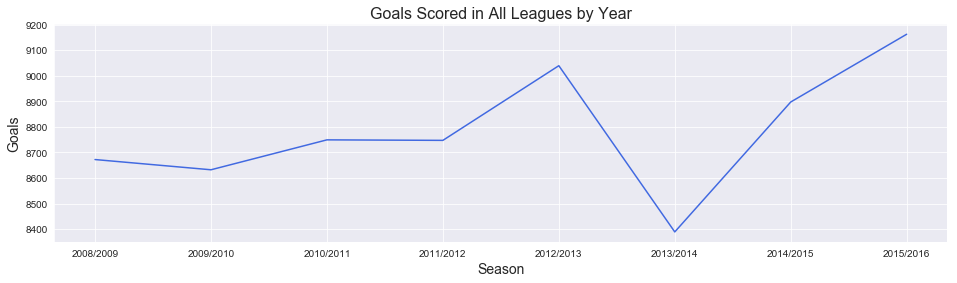

In [47]:
goals_per_year = []
seasons = leaguesFinal['season'].unique()

for i in range(0,8):
    mask = leaguesFinal['season'] == seasons[i]
    goals = leaguesFinal[mask]['home_team_goal'].sum() + leaguesFinal[mask]['away_team_goal'].sum()
    goals_per_year.append(goals)

df = pd.DataFrame([goals_per_year]).transpose()
df['Season'] = ['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016']
df = df.rename(columns = {0 : 'Goals'})

#
sns.set_style("darkgrid")
plt.figure(figsize=(16, 4))
plt.plot(df['Season'], df['Goals'], color = 'royalblue')
plt.ylabel('Goals', fontsize = 14)
plt.xlabel('Season', fontsize = 14)
plt.title('Goals Scored in All Leagues by Year', fontsize = 16)
mpl.rcParams['agg.path.chunksize'] = 10000

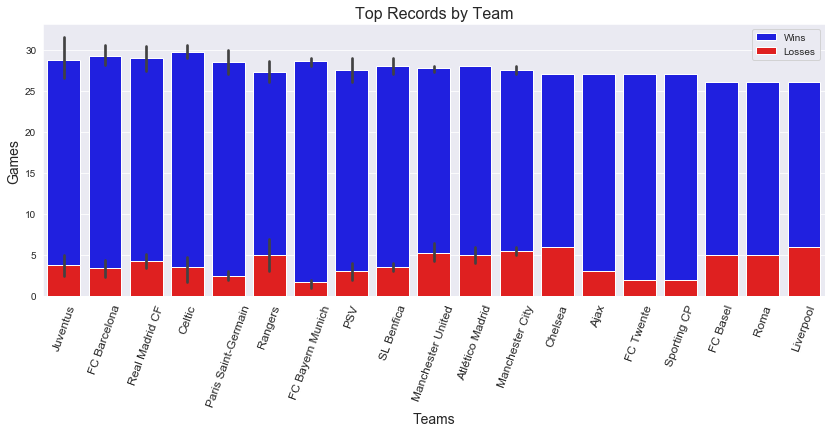

In [48]:
d = teamRecords.sort_values(by = 'Wins', ascending=False)
plt.figure(figsize=(14,5))
sns.barplot('Team', 'Wins', data = d[:50], color = 'b', label = 'Wins')
sns.barplot('Team', 'Losses', data = d[:50], color = 'r', label = 'Losses')
plt.xticks(rotation = 70, fontsize = 12)
plt.xlabel('Teams', fontsize = 14)
plt.ylabel('Games', fontsize = 14)
plt.legend(loc="best")
plt.title('Top Records by Team', fontsize = 16)
plt.show()

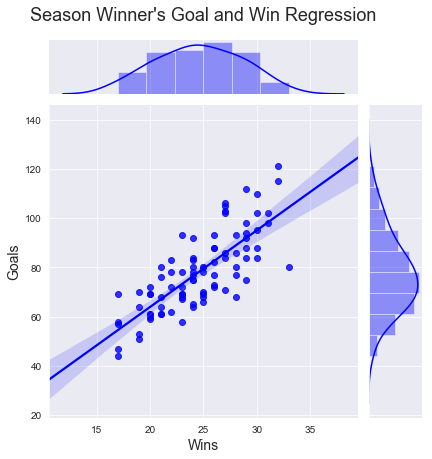

In [49]:
sns.jointplot(leagueWinners_season['Wins'], leagueWinners_season['Goals'], kind = 'reg', color = 'b')
plt.title('Season Winner\'s Goal and Win Regression', y = 1.25, fontsize = 18)
plt.xlabel('Wins', fontsize=14)
plt.ylabel('Goals', fontsize=14)
plt.show()

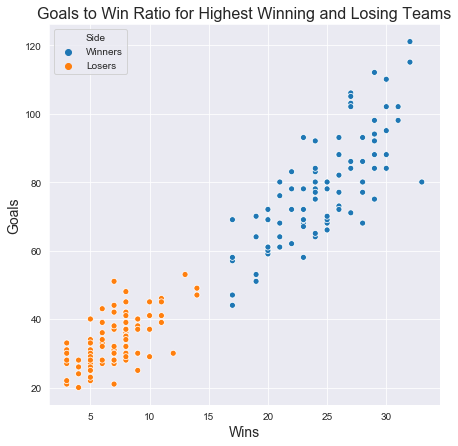

In [50]:
leagueWinners_season['Side'] = 'Winners'
leagueLosers_season['Side'] = 'Losers'
scatter = leagueWinners_season.merge(leagueLosers_season, how = 'outer')
scatter = scatter[['Wins', 'Goals', 'Side']]
plt.figure(figsize=(7,7))
plt.title('Goals to Win Ratio for Highest Winning and Losing Teams', fontsize = 16)
plt.xlabel('Wins', fontsize=14)
plt.ylabel('Goals', fontsize=14)
ax = sns.scatterplot(x = 'Wins', y = 'Goals', hue = 'Side', data = scatter)

Graph team attributes - winning vs losing? winning in top of each league? 
histogram 
Using something like this to break apart attributes features and quantify them?...

#This first concatenates your dataframe and the output of the get_dummies call, then it 
#groups the result according to the relevant columns, takes the sum of those columns among 
#those groups and then resets the index so you don't have to deal with a multi-index data frame
errorFeatures = pd.concat([errorData, pd.get_dummies(errorData.errorID)], 1).groupby(['machineID', 'datetime']).sum().reset_index()